# Logistic Regression

Logistc regression works similarly to linear regression, in fact it is often considered a linear model (see [sklearn's logistic regression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).  The main difference is that the response (dependent) variable consists of only zeros and ones, $y \in \{0,1\}$.

Like in linear regression, there are coefficients $\beta_j$ for $j \in 1:J$ which associate the predictors $x_j$ to the response. Because the response variable $y_n$ for observations $n \in 1:N$ is only $0$ or $1$, the coefficients and the predictors together estimate probabilities of observing $y = 1$ or $y = 0$. 

Recall that the form

$$\beta_0 + \beta_1 x_n$$

is the basis of linear regression.  The output of this form is theoretically any real number, not necessarily in $[0, 1]$.  Thus, logistic regression simply takes this form and transforms the output to live within $[0, 1]$.  Consider the [logistic function](https://en.wikipedia.org/wiki/Logistic_regression#Definition_of_the_logistic_function)

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

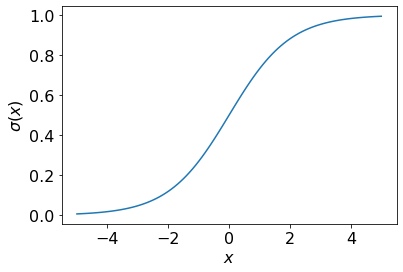

In [6]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 101)
plt.plot(x, logistic(x));
plt.xlabel("$x$");
plt.ylabel("$\sigma(x)$");

Logistic regression is the composition of these two pieces, just wrap linear regression in the logistic function and Bob's your uncle.

$$\hat{P}[y_n = 1 | x] = \sigma(\hat{\beta}_0 + \hat{\beta}_1 x_n) = \frac{1}{1 + \exp\{-(\hat{\beta}_0 + \hat{\beta}_1 x_n))\}}$$

In [7]:
aita_url = "https://raw.githubusercontent.com/roualdes/data/master/aita_clean_really_lightweight.csv"
df = pd.read_csv(aita_url)
df["body"].fillna("", inplace = True)
df.head()

id   timestamp                                              title  \
0  arfcfl  1550365421                   AITA - Getting Hugged At The Bar   
1  cg8mxn  1563769917  AITA if i don't want to pay my friend 5 dollar...   
2  bajsje  1554663842  AITA For going to 'expensive' restaurants in s...   
3  cq6voc  1565771883  AITA for wanting "free gas", due to an attenda...   
4  bz4m2k  1560207411  AITA I asked my dad to replace the fuel that h...   

                                                body        edited  \
0   \n\nThis all happened less than an hour ago.\...         False   
1  So, my friend bought herself, our other friend...         False   
2  It's in Seattle if that matters. It seems peop...  1554686830.0   
3  I was with my dad and driving the family car w...  1565773989.0   
4  Am I the asshole for asking my dad to replace ...         False   

           verdict  score  num_comments  is_asshole  
0  not the asshole      3            14           0  
1          asshole     11            42           1  
2          asshole    657           397           1  
3  not the asshole     49            40           0  
4  not the asshole      4            10           0

In [8]:
N = np.shape(df)[0]
X = np.c_[df["num_comments"]]
fit = LogisticRegression().fit(X, df["is_asshole"])

In [9]:
fit.coef_

array([[0.00026541]])

In [16]:
fit.intercept_

array([-1.15499199])

In [23]:
X[2:4, :]

array([[397],
       [ 40]])

In [25]:
fit.predict_proba(X[2:4, :])

array([[0.74070291, 0.25929709],
       [0.75848211, 0.24151789]])

In [13]:
fit.predict(X[2:4, :])

array([0, 0])

The method `fit()` on class `LogisticRegression` is performing optimization (specifically minimization) for us, using the L-BFGS-B method on a loss function particular to logistic regression:

$$ loss(\beta|x, y) = -\sum_{n=1}^N \left\{ y_n (\beta_0 + \sum_{j=1}^J \beta_j x_{n,j}) - \log(1 + \exp( \beta_0 + \sum_{j=1}^J \beta_j x_{n,j} )) \right\}$$

In [14]:
data = {
    "N": N,
    "X": np.c_[df["num_comments"]],
    "y": df["is_asshole"],
}
def loss(theta, data):
    lm = theta[0] + data["X"] @ theta[1:]
    return -np.sum(data["y"] * lm - np.log1p(np.exp(lm)))

In [15]:
minimize(loss, np.zeros(2),
         args = (data), 
         method = "L-BFGS-B")

      fun: 555.0854764205295
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.13686838e-05, -5.45696821e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 21
     njev: 28
   status: 0
  success: True
        x: array([-1.15499141e+00,  2.65402200e-04])